# IMPORTING FLAT FILES IN PYTHON

## 1. Importing Raw Text using Open

In [17]:
# Open a file: file
file = open("datasets/seaslug.txt", mode = "r")

# Print the full content of the file
print(file.read(50))

# Check whether file is closed
print(file.closed)

# Close file
file.close()

# Check whether file is closed
print(file.closed)


# Read & print the first 3 lines
with open('datasets/seaslug.txt') as file:
    print(file.readline())
    print(file.readline())
    print(file.readline())

# OUTPUT
# ============
# # Time    Percent
# 99      0.067
# 99      0.133

Time	Percent
99	0.067
99	0.133
99	0.067
99	0
99	0

False
True
Time	Percent

99	0.067

99	0.133



## 2. Importing Flat Files using Numpy

### 2.1 Importing using loadtxt()

<class 'numpy.ndarray'>
(100, 785)
[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   2.  89. 208. 135.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   5.  70. 254. 203.   8.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.  27. 189. 254. 230.  18.   0.   0.   0.   0.   0.]]


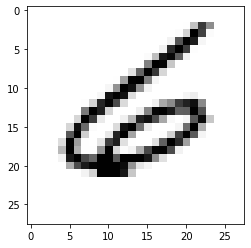

In [12]:
# Import package
import numpy as np
import matplotlib.pyplot as plt

# Assign filename to variable: file
file = 'datasets/mnist.csv'

# Load file as array: digits
digits = np.loadtxt(file, delimiter=",")

# Print datatype of digits
print(type(digits))

# Select and reshape a row
im = digits[21, 1:]
print(digits.shape)
im_sq = np.reshape(im, (28, 28))
print(im_sq[0:5])
# Plot reshaped data (matplotlib.pyplot already loaded as plt)
plt.imshow(im_sq, cmap='Greys', interpolation='nearest')
plt.show()


### 2.2 Customising loadtxt() import

In [11]:
# Assign the filename: file
file = 'datasets/seaslug.txt'

# Load the data: data
# file you're importing is tab-delimited, 
# you want to skip the first row and you only want to import the first and second columns.
data = np.loadtxt(file, delimiter="\t", skiprows=1, usecols=[0, 1])

# Print data
print(data[0:5])


[[9.90e+01 6.70e-02]
 [9.90e+01 1.33e-01]
 [9.90e+01 6.70e-02]
 [9.90e+01 0.00e+00]
 [9.90e+01 0.00e+00]]


### 2.3 Mixed datatypes import with loadtxt()

In [38]:
# Import package
import numpy as np
import matplotlib.pyplot as plt

# Assign filename: file
file = 'datasets/seaslug.txt'

# Import file: data ========Importing using loadtxt()
data = np.loadtxt(file, delimiter='\t', dtype=str)

# Print the first element of data
print(data[0:2])

[['Time' 'Percent']
 ['99' '0.067']]


[0.    0.357]


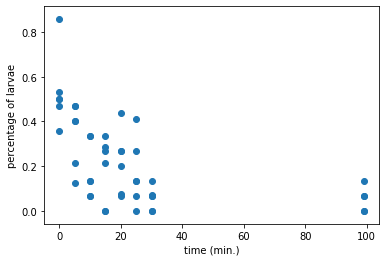

In [34]:
# Import data as floats and skip the first row: data_float
data_float = np.loadtxt(file, delimiter="\t", dtype=float, skiprows=1)

# Print the 10th element of data_float
print(data_float[9])

# Plot a scatterplot of the data
plt.scatter(data_float[:, 0], data_float[:, 1])
plt.xlabel('time (min.)')
plt.ylabel('percentage of larvae')
plt.show()


### 2.4 Mixed datatypes import with genfromtxt()

In [32]:
# ===================== Importing data with genfromtxt()
file = "datasets/titanic_sub.csv"
data = np.genfromtxt(file, delimiter = ",", names = True)
print(data[-1])
print(data.dtype)
print(data["Survived"][-5: -1])

(891., 0., 3., nan, 32., 0., 0., 370376., 7.75, nan, nan)
[('PassengerId', '<f8'), ('Survived', '<f8'), ('Pclass', '<f8'), ('Sex', '<f8'), ('Age', '<f8'), ('SibSp', '<f8'), ('Parch', '<f8'), ('Ticket', '<f8'), ('Fare', '<f8'), ('Cabin', '<f8'), ('Embarked', '<f8')]
[0. 1. 0. 1.]


### 2.5 Mixed datatypes import with recfromcsv()

In [23]:
# ===================== Importing data with recfromcsv()
# Import file using np.recfromcsv: d
# defaults:  delimiter=',' and names=True in addition to dtype=None!
d = np.recfromcsv(file)

# Print out first three entries of d
print(d[:3])

[(1, 0, 3, b'male', 22., 1, 0, b'A/5 21171',  7.25  , b'', b'S')
 (2, 1, 1, b'female', 38., 1, 0, b'PC 17599', 71.2833, b'C85', b'C')
 (3, 1, 3, b'female', 26., 0, 0, b'STON/O2. 3101282',  7.925 , b'', b'S')]


## 3. Importing Using Pandas

### 3.1 Pandas Importing

In [40]:
# Import pandas as pd
import pandas as pd

# Assign the filename: file
file = 'datasets/titanic_sub.csv'

# Read the file into a DataFrame: df
df = pd.read_csv(file)

# View the head of the DataFrame
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


### 3.2 Pandas Importing with nrows and header attributes

In [49]:
# Assign the filename: file
file = 'datasets/mnist.csv'

# Read the first 5 rows of the file into a DataFrame: data
data = pd.read_csv(file, nrows = 5, header = None)
print(data)

# Build a numpy array from the DataFrame: data_array
data_array = np.array(data)
print(data_array)

# Print the datatype of data_array to the shell
print(type(data_array))

   0    1    2    3    4    5    6    7    8    9    ...  775  776  777  778  \
0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  4.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

   779  780  781  782  783  784  
0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 785 columns]
[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [4. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
<class 'numpy.ndarray'>


### 3.3 Customising Pandas import

   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  \
0            1         0       3    male  22.0      1      0   
1            2         1       1  female  38.0      1      0   
2            3         1       3  female  26.0      0      0   
3            4         1       1  female  35.0      1      0   
4            5         0       3    male  35.0      0      0   

             Ticket     Fare Cabin Embarked  
0         A/5 21171   7.2500   NaN        S  
1          PC 17599  71.2833   C85        C  
2  STON/O2. 3101282   7.9250   NaN        S  
3            113803  53.1000  C123        S  
4            373450   8.0500   NaN        S  


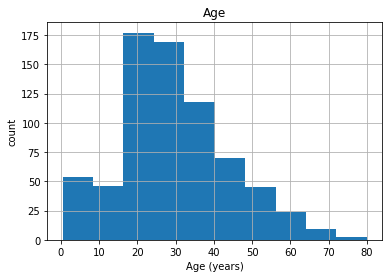

In [62]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Assign filename: file
file = 'datasets/titanic_sub.csv'

# Import file: data
data = pd.read_csv(file, sep=",", comment="#", na_values="Nothing")

# Print the head of the DataFrame
print(data.head())

# Plot 'Age' variable in a histogram
pd.DataFrame.hist(data[['Age']])
plt.xlabel('Age (years)')
plt.ylabel('count')
plt.show()